In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("countries.csv")

In [4]:
data.head(10)

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [5]:
data.shape

(1704, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         1704 non-null   object 
 1   continent       1704 non-null   object 
 2   year            1704 non-null   int64  
 3   lifeExpectancy  1704 non-null   float64
 4   population      1704 non-null   int64  
 5   gdpPerCapita    1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [7]:
data.describe()

,year,lifeExpectancy,population,gdpPerCapita
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [8]:
df = data.copy()

In [ ]:
Data Collection
Data Profiling and understanding
Data Cleaning : spelling mistakes, null values, 
Data Analysis
Data Visualization

In [9]:
# lifeExpectancy  -- min, country, year
# lifeExpectancy  -- max, country, year

In [10]:
df.lifeExpectancy.min()

23.599

In [11]:
df.where(df.lifeExpectancy == df.lifeExpectancy.min())[["country","year","lifeExpectancy"]].dropna()                                         

,country,year,lifeExpectancy
1292,Rwanda,1992.0,23.599


In [12]:
df[['country', 'year', 'lifeExpectancy']][df.lifeExpectancy == df.lifeExpectancy.min()]  #min

,country,year,lifeExpectancy
1292,Rwanda,1992,23.599


In [13]:
df[['country', 'year', 'lifeExpectancy']][(df.country == 'Japan') & (df.year == 1992)]

,country,year,lifeExpectancy
800,Japan,1992,79.36


In [14]:
df[['country', 'year', 'lifeExpectancy']][df.lifeExpectancy == df.lifeExpectancy.max()]  #max

,country,year,lifeExpectancy
803,Japan,2007,82.603


In [15]:
df[['country', 'year', 'lifeExpectancy']][(df.country == 'Rwanda') & (df.year == 2007)]

,country,year,lifeExpectancy
1295,Rwanda,2007,46.242


In [16]:
df[['country', 'year', 'lifeExpectancy']][df.lifeExpectancy == df.lifeExpectancy.min()]

,country,year,lifeExpectancy
1292,Rwanda,1992,23.599


In [17]:
df[['country', 'year', 'lifeExpectancy']][df.lifeExpectancy == df.lifeExpectancy.max()]

,country,year,lifeExpectancy
803,Japan,2007,82.603


In [18]:
df[(df.country == 'India') & (df.year == 2007)]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
707,India,Asia,2007,64.698,1110396331,2452.210407


In [19]:
df[(df.country == 'India') & (df.year == 1952)]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
696,India,Asia,1952,37.373,372000000,546.565749


In [20]:
df[['country', 'lifeExpectancy']][(df.year == 2007) & (df.lifeExpectancy == df['lifeExpectancy'][df.year == 2007].max())]

,country,lifeExpectancy
803,Japan,82.603


In [21]:
df[['country', 'lifeExpectancy']][(df.year == 2007) & (df.lifeExpectancy == df['lifeExpectancy'][df.year == 2007].min())]

,country,lifeExpectancy
1463,Swaziland,39.613


In [22]:
df['lifeExpectancy'][df.year == 2007].min()

39.613

In [23]:
clf = df[['country', 'lifeExpectancy']][df.year == 2007].sort_values(by = 'lifeExpectancy', ascending = False).head(10)

In [24]:
clf

,country,lifeExpectancy
803,Japan,82.603
671,"Hong Kong, China",82.208
695,Iceland,81.757
1487,Switzerland,81.701
71,Australia,81.235
1427,Spain,80.941
1475,Sweden,80.884
767,Israel,80.745
539,France,80.657
251,Canada,80.653


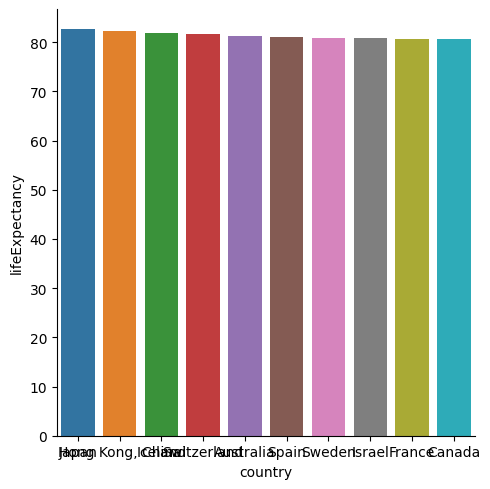

In [25]:
sns.catplot(x = 'country', y = 'lifeExpectancy', data = clf, kind='bar')
plt.show()

In [26]:
cgdp = df[['country', 'gdpPerCapita']][df.year == 2007].sort_values(by = 'gdpPerCapita', ascending = False).head(10)

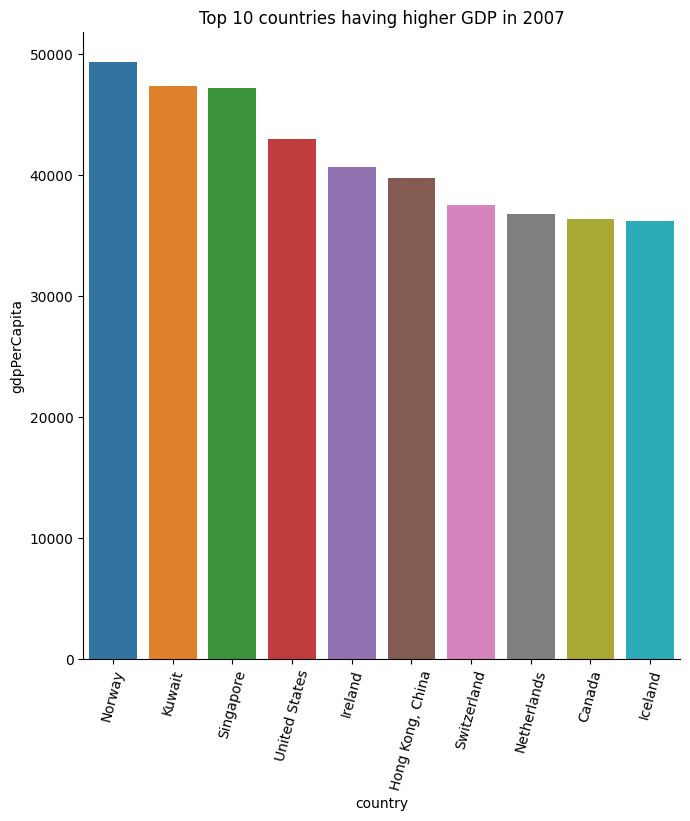

In [27]:
sns.catplot(x = 'country', y = 'gdpPerCapita', data = cgdp, kind='bar', aspect = 1, height = 7)
plt.title("Top 10 countries having higher GDP in 2007")
plt.xticks(rotation = 75)
plt.show()

In [28]:
df.columns

Index(['country', 'continent', 'year', 'lifeExpectancy', 'population',
       'gdpPerCapita'],
      dtype='object')

In [29]:
df.groupby(['continent'])['lifeExpectancy'].mean()

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExpectancy, dtype: float64

In [30]:
data.lifeExpectancy.max()

82.603

In [31]:
data.lifeExpectancy == data.lifeExpectancy.max()

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: lifeExpectancy, Length: 1704, dtype: bool

In [32]:
data[['country','year', 'lifeExpectancy']][data.lifeExpectancy == data.lifeExpectancy.max()]

,country,year,lifeExpectancy
803,Japan,2007,82.603


In [33]:
data[['country','year', 'lifeExpectancy']][data.lifeExpectancy == data.lifeExpectancy.min()]

,country,year,lifeExpectancy
1292,Rwanda,1992,23.599


In [34]:
data.year.min()

1952

In [35]:
data.year.max()

2007

In [36]:
# year - 1952  lifeExpectancy--country -- max % min
# year - 2007  lifeExpectancy--country -- max % min

In [37]:
data['lifeExpectancy'][data.year == 1952].min()

28.801

In [38]:
data['country'][data.lifeExpectancy == data['lifeExpectancy'][data.year == 1952].min()]

0    Afghanistan
Name: country, dtype: object

In [39]:
data[['country', 'lifeExpectancy']][(data.year == 1952) & (data.lifeExpectancy == data['lifeExpectancy'][data.year == 1952].min())]

,country,lifeExpectancy
0,Afghanistan,28.801


In [40]:
# data[(data.year==1992)&(data.lifeExpectancy<30)]

In [41]:
data[['country', 'lifeExpectancy']][(data.year == 1952) & (data.lifeExpectancy == data['lifeExpectancy'][data.year == 1952].max())]

,country,lifeExpectancy
1140,Norway,72.67


In [42]:
# max/min gdp ...... country ..year
# 2007  top 5 counrty name with gdp ranking.. 

In [43]:
data.gdpPerCapita.sort_values(ascending=False).head(5)

853    113523.13290
856    109347.86700
852    108382.35290
854     95458.11176
855     80894.88326
Name: gdpPerCapita, dtype: float64

In [44]:
data[['country', 'year', 'gdpPerCapita']][data.year == 2007].sort_values(by = 'gdpPerCapita', ascending = False).head()

,country,year,gdpPerCapita
1151,Norway,2007,49357.19017
863,Kuwait,2007,47306.98978
1367,Singapore,2007,47143.17964
1619,United States,2007,42951.65309
755,Ireland,2007,40675.99635


In [45]:
data[['country', 'year', 'gdpPerCapita']][data.year == 1952].sort_values(by = 'gdpPerCapita', ascending = False).head()

,country,year,gdpPerCapita
852,Kuwait,1952,108382.35290
1476,Switzerland,1952,14734.23275
1608,United States,1952,13990.48208
240,Canada,1952,11367.16112
1092,New Zealand,1952,10556.57566


In [46]:
data[['country', 'gdpPerCapita']][data.year == 2007].sort_values(by = 'gdpPerCapita').head()

,country,gdpPerCapita
335,"Congo, Dem. Rep.",277.551859
899,Liberia,414.507341
215,Burundi,430.070692
1703,Zimbabwe,469.709298
635,Guinea-Bissau,579.231743


In [47]:
df[['country', 'population']][(df.year == 1952) & (df.continent == 'Asia')].sort_values(by = 'population', ascending = False).head()

,country,population
288,China,556263527
696,India,372000000
792,Japan,86459025
708,Indonesia,82052000
96,Bangladesh,46886859


In [48]:
df[['country', 'population']][(df.year == 2007) & (df.continent == 'Asia')].sort_values(by = 'population', ascending = False).head()

,country,population
299,China,1318683096
707,India,1110396331
719,Indonesia,223547000
1175,Pakistan,169270617
107,Bangladesh,150448339


In [49]:
df[['country', 'gdpPerCapita']][(df.year == 1952) & (df.continent == 'Asia')].sort_values(by = 'gdpPerCapita', ascending = False).head()

,country,gdpPerCapita
852,Kuwait,108382.352900
84,Bahrain,9867.084765
1308,Saudi Arabia,6459.554823
864,Lebanon,4834.804067
732,Iraq,4129.766056


In [50]:
df[['country', 'gdpPerCapita']][(df.year == 2007) & (df.continent == 'Asia')].sort_values(by = 'gdpPerCapita', ascending = False).head()

,country,gdpPerCapita
863,Kuwait,47306.98978
1367,Singapore,47143.17964
671,"Hong Kong, China",39724.97867
803,Japan,31656.06806
95,Bahrain,29796.04834


In [51]:
df[['country', 'year', 'lifeExpectancy']][df.lifeExpectancy == df.lifeExpectancy.min()]

,country,year,lifeExpectancy
1292,Rwanda,1992,23.599


In [52]:
df['lifeExpectancy'][(df.country == 'Rwanda') & (df.year == 2007)]

1295    46.242
Name: lifeExpectancy, dtype: float64

In [53]:
le_rawanda = pd.DataFrame({"Year": [1952, 2007], "LifeExpectancy": [23.599, 46.242]})

In [54]:
le_rawanda

,Year,LifeExpectancy
0,1952,23.599
1,2007,46.242


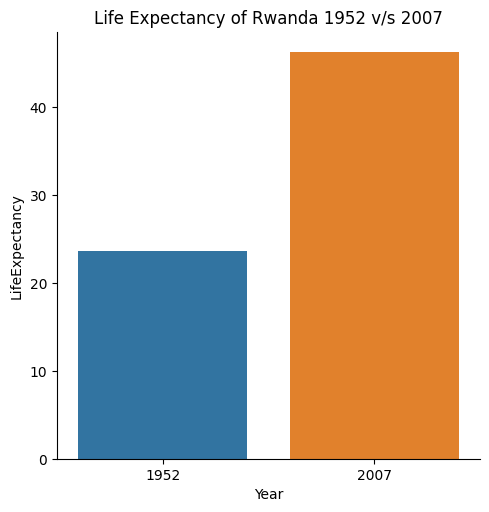

In [55]:
sns.catplot(x = 'Year', y = 'LifeExpectancy', data = le_rawanda, kind = 'bar')
plt.title("Life Expectancy of Rwanda 1952 v/s 2007")
plt.show()

In [56]:
data['gdpPerCapita'][(data['country']  == 'Congo, Dem. Rep.') & (data.year == 1952)]

324    780.542326
Name: gdpPerCapita, dtype: float64

In [57]:
data.columns

Index(['country', 'continent', 'year', 'lifeExpectancy', 'population',
       'gdpPerCapita'],
      dtype='object')

In [58]:
# Aisa - country - 1952 - max

In [59]:
# Asia - 2007 country & population ranking.

In [60]:
asia_pop = data[['country', 'population']][(data.year == 1952) & (data.continent == 'Asia')].sort_values(by = 'population', ascending=False).head()

In [61]:
asia_pop

,country,population
288,China,556263527
696,India,372000000
792,Japan,86459025
708,Indonesia,82052000
96,Bangladesh,46886859


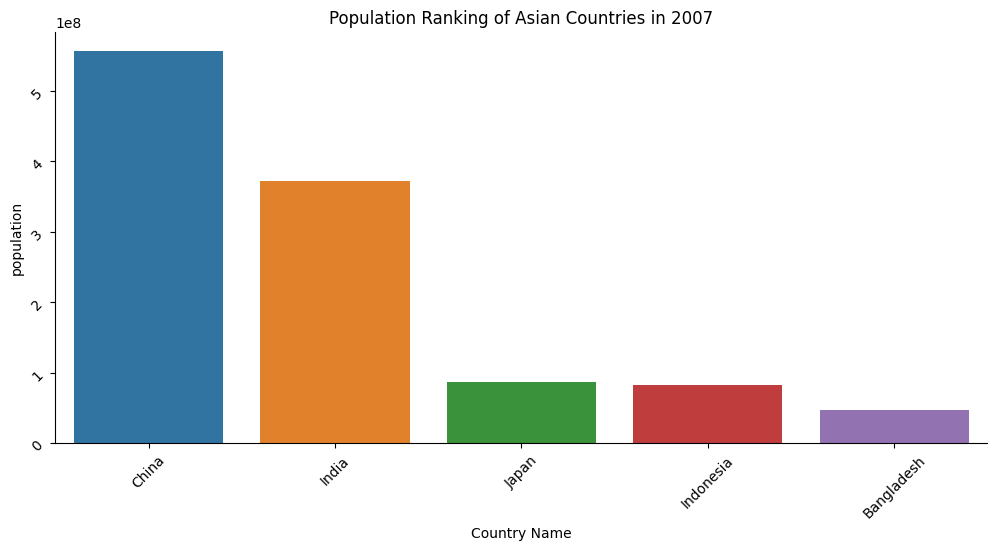

In [62]:
sns.catplot(x='country', y='population', data=asia_pop, kind='bar', height = 5, aspect = 2)
plt.title("Population Ranking of Asian Countries in 2007")
plt.xlabel("Country Name")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [63]:
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [64]:
# Avg lifeExpectancy----  'continent -- country' wise...

In [65]:
data.groupby(['continent', 'country'])['lifeExpectancy'].mean()

continent  country       
Africa     Algeria           59.030167
           Angola            37.883500
           Benin             48.779917
           Botswana          54.597500
           Burkina Faso      44.694000
                               ...    
Europe     Switzerland       75.565083
           Turkey            59.696417
           United Kingdom    73.922583
Oceania    Australia         74.662917
           New Zealand       73.989500
Name: lifeExpectancy, Length: 142, dtype: float64

In [66]:
data[['country', 'year', 'lifeExpectancy']][data['lifeExpectancy']<30]

,country,year,lifeExpectancy
0,Afghanistan,1952,28.801
1292,Rwanda,1992,23.599


In [67]:
data2007 = data[data['year']==2007]

In [68]:
data2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


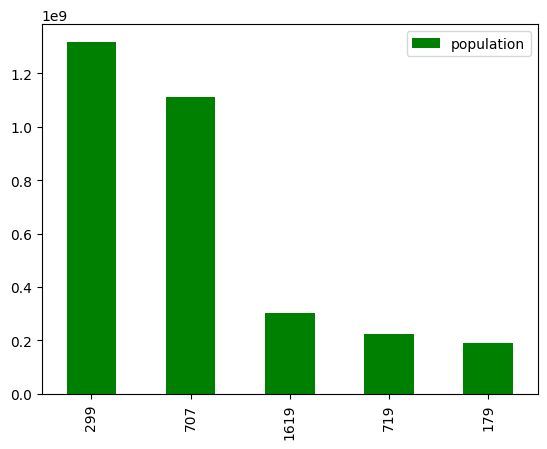

In [69]:
data2007[['country', 'population']].sort_values(by = 'population', ascending = False).head().plot(kind='bar', color ='green')
plt.show()

In [70]:
bar = data2007[['country', 'population']].sort_values(by = 'population', ascending = False).head(10)

In [71]:
bar

,country,population
299,China,1318683096
707,India,1110396331
1619,United States,301139947
719,Indonesia,223547000
179,Brazil,190010647
1175,Pakistan,169270617
107,Bangladesh,150448339
1139,Nigeria,135031164
803,Japan,127467972
995,Mexico,108700891


In [72]:
plt.figure(figsize=(12,8))

sns.barplot(bar['country'], bar['population'])

plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1200x800 with 0 Axes>

In [73]:
c = data2007[['lifeExpectancy', 'population', 'gdpPerCapita']].corr()
c

,lifeExpectancy,population,gdpPerCapita
lifeExpectancy,1.000000,0.047553,0.678662
population,0.047553,1.000000,-0.055676
gdpPerCapita,0.678662,-0.055676,1.000000


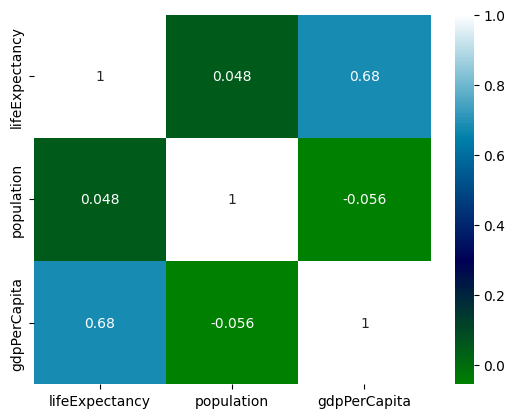

In [74]:
sns.heatmap(c, annot = True, cmap='ocean')
plt.show()

In [75]:
data2007 = data[data.year==2007]
data1952 = data[data.year==1952]
data2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


<Axes: xlabel='gdpPerCapita', ylabel='Density'>

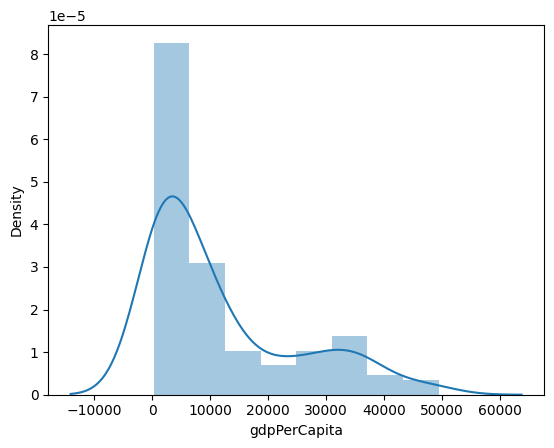

In [76]:
sns.distplot(data2007['gdpPerCapita'])

In [77]:
sns.boxplot(data2007['gdpPerCapita'])

KeyError: 0

In [ ]:
sns.boxplot(np.log10(data2007['gdpPerCapita']))

In [ ]:
sns.distplot(data2007['population'])

In [ ]:
sns.distplot(np.log10(data2007['population']))

In [ ]:
import numpy as np
sns.distplot(np.log10(data2007['gdpPerCapita']))

In [ ]:
sns.boxplot(data2007['gdpPerCapita'])

In [ ]:
sns.distplot(data2007['lifeExpectancy'])

In [ ]:
sns.boxplot(data2007['lifeExpectancy'])

In [ ]:
sns.boxplot(x='year',y='gdpPerCapita',data=data)

In [78]:
data[(data.year==1952)&(data.gdpPerCapita>40000)]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.3529


In [79]:
data[(data.year==1957)&(data.gdpPerCapita>40000)]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
853,Kuwait,Asia,1957,58.033,212846,113523.1329


In [80]:
data[(data.year==1962)&(data.gdpPerCapita>40000)]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
854,Kuwait,Asia,1962,60.47,358266,95458.11176


In [81]:
data[(data.year==1967)&(data.gdpPerCapita>40000)]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
855,Kuwait,Asia,1967,64.624,575003,80894.88326


<Axes: xlabel='year', ylabel='lifeExpectancy'>

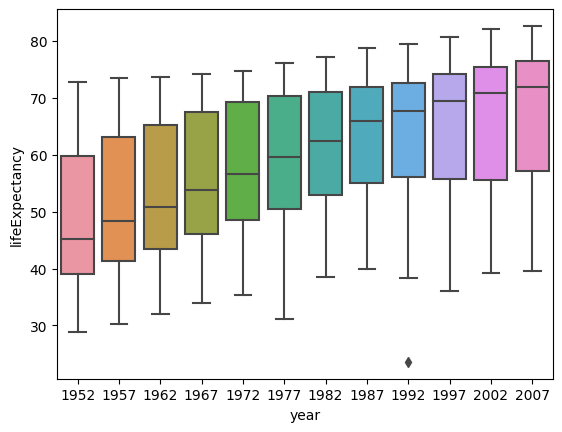

In [82]:
sns.boxplot(x='year',y='lifeExpectancy',data=data)

In [83]:
data[(data.year==1992)&(data.lifeExpectancy<30)]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
1292,Rwanda,Africa,1992,23.599,7290203,737.068595


In [84]:
sns.boxplot(data2007['population'])

KeyError: 0

In [ ]:
data2007[data2007.population>200000000]

In [ ]:
sns.boxplot(x='year',y='population',data=data)

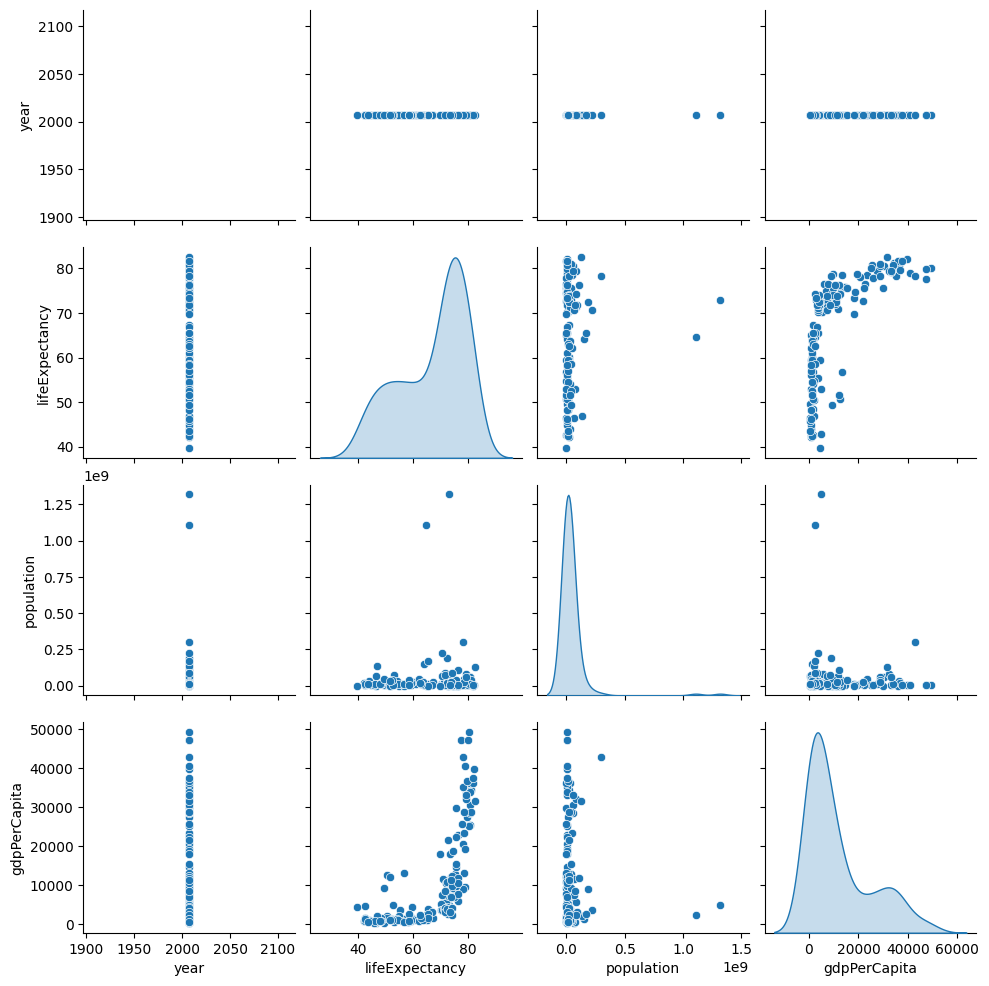

In [85]:
sns.pairplot(data2007,diag_kind='kde')

<Axes: xlabel='gdpPerCapita', ylabel='continent'>

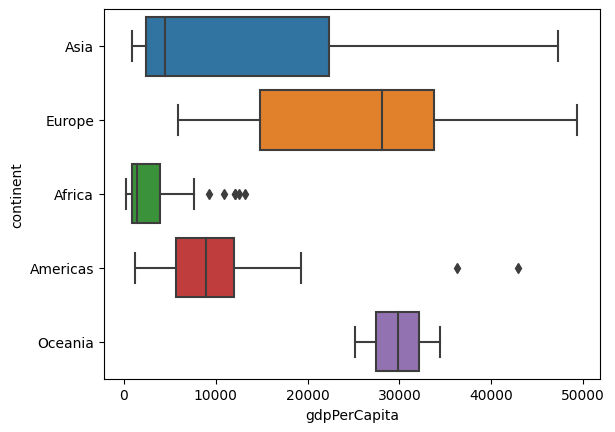

In [86]:
sns.boxplot(x='gdpPerCapita',y='continent',data=data2007)

<Axes: xlabel='gdpPerCapita', ylabel='Density'>

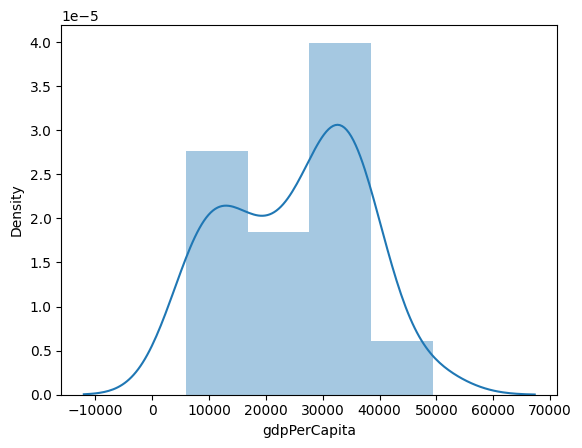

In [87]:
europe2007=data2007[data2007.continent=='Europe']
asia2007=data2007[data2007.continent=='Asia']
sns.distplot(europe2007['gdpPerCapita'])

<Axes: xlabel='gdpPerCapita', ylabel='Density'>

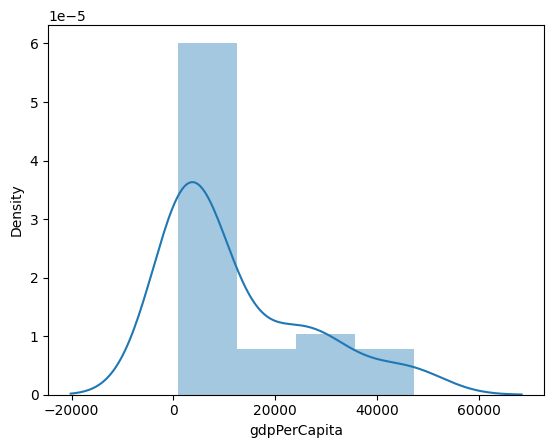

In [88]:
sns.distplot(asia2007['gdpPerCapita'])

<Axes: xlabel='lifeExpectancy', ylabel='continent'>

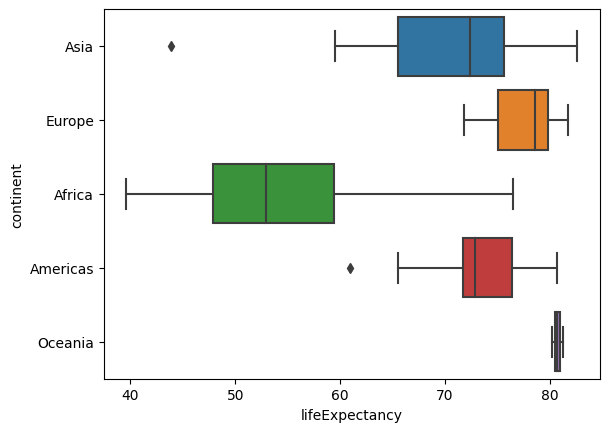

In [89]:
sns.boxplot(x='lifeExpectancy',y='continent',data=data2007)

In [90]:
data2007.head()
data2007 = data2007.drop('year',axis=1)

In [91]:
data2007.corr()

,lifeExpectancy,population,gdpPerCapita
lifeExpectancy,1.000000,0.047553,0.678662
population,0.047553,1.000000,-0.055676
gdpPerCapita,0.678662,-0.055676,1.000000


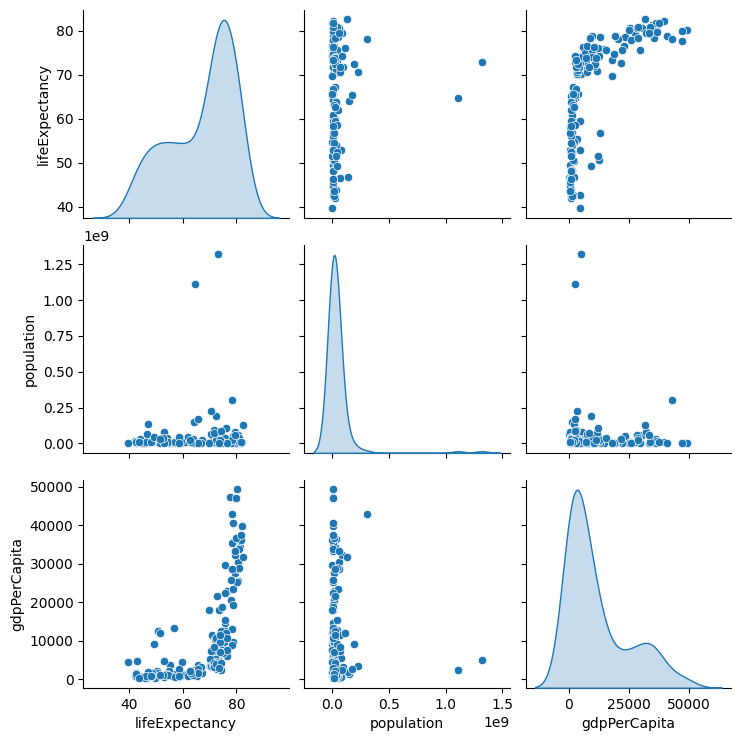

In [92]:
sns.pairplot(data2007,diag_kind='kde')

In [93]:
cars = pd.read_csv("auto-mpg.csv")
cars.head()

FileNotFoundError: [Errno 2] No such file or directory: 'auto-mpg.csv'

In [ ]:
sns.boxplot(x='hp',y='origin',data = cars)

In [ ]:
sns.boxplot(x='mpg',y='origin',data = cars)

In [ ]:
cars.corr()

In [ ]:
sns.heatmap(cars.corr(),annot=True)
plt.show()